In [1]:
# Gabriel Chang

# funcion para descargar paquetes al ejecutar el scrip, sin necesidad de hacerlo por la terminal

import os
import subprocess
import sys

# en ese arreglo incluyo los paquetes que debo instalar, para facilitar el mantenimiento
required_packages = ['gdown', 'pandas', 'matplotlib', 'wordcloud', 'nltk', 'plotly', 'scikit-learn']

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [2]:
for package in required_packages:
    try:
        __import__(package)
        print(f"'{package}' ya está instalado.")
    except ImportError:
        print(f"'{package}' no está instalado. Instalando...")
        install(package)

'gdown' ya está instalado.
'pandas' ya está instalado.
'matplotlib' ya está instalado.
'wordcloud' ya está instalado.
'nltk' ya está instalado.
'plotly' ya está instalado.
'scikit-learn' no está instalado. Instalando...


In [3]:
# Import de librerias y otros recursos

import os
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import plotly.express as px
from nltk.corpus import stopwords


nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import string

[nltk_data] Downloading package stopwords to C:\Users\Yamila Karim
[nltk_data]     Conrado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# ESTE SEGMENTO DE CODIGO ES PARA BUSCAR EL DATA SET EN DICHO ENLACE Y DESCRGARLO
# PRIMERO LO BUSCO SI, EN EL PROYECTO PARA VER SI YA ESTÁ

url = 'https://drive.google.com/uc?id=1nONpng5xOXNr2kK-bdtLL4RsaingezVK'
dataset = 'Reviews.csv'

if os.path.exists(dataset):
    print(f'El archivo "{dataset}" ya existe en la carpeta.')
else:
    print(f'Descargando el archivo "{dataset}"...')
    gdown.download(url, dataset, quiet=False)

# Intentar cargar el DataFrame
try:
    df = pd.read_csv(dataset)
    print('ARCHIVO CSV CARGADO EXITOSAMENTE')
    print('\nIMPRIMIENDO HEAD DEL DATASET:\n', df.head())
except Exception as ex:
    print('ERROR AL CARGAR EL DATAFRAME --> ', ex)

El archivo "Reviews.csv" ya existe en la carpeta.
ARCHIVO CSV CARGADO EXITOSAMENTE

IMPRIMIENDO HEAD DEL DATASET:
    Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                   

In [5]:
# Cantidad de registros:
print('CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET --> ', df.shape[0])

# Cantidad de columnas:
print('\nCANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET --> ', df.shape[1])

# Descripcion de los datos
print(f'\nIMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:\n')
print(df.info())

# Estadísticas básicas
print(f'\nIMPRMIENDO ESTADÍSTICAS BÁSICAS DEL DATA FRAME:')
print(df.describe().T)

CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET -->  568454

CANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET -->  10

IMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None

IMPRMIENDO ESTADÍSTICAS BÁSICAS D

In [7]:
# aqui busco la frecuencia de las valores de la columna "score" para el grafico que voy a pintar
freq_valores_score = df['Score'].value_counts().sort_index()

figure = px.bar(freq_valores_score,
                x=freq_valores_score.index, 
                y=freq_valores_score.values, 
                labels={
                        'x': 'Score',
                        'y': 'Count'
                    },
                title='Distribución de Valores - Score de Productos')


figure.show()

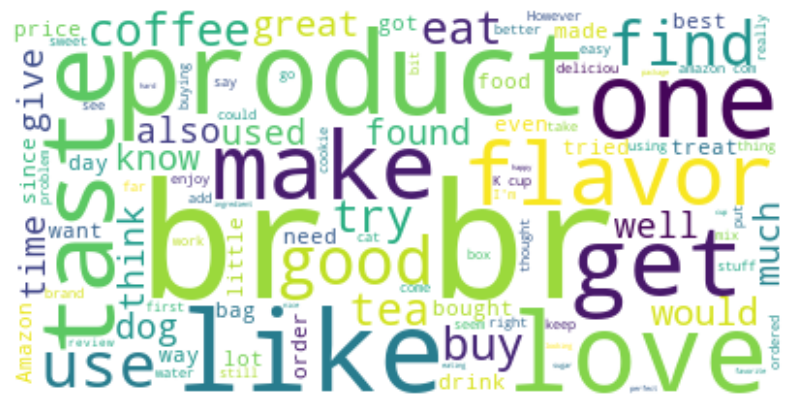

In [6]:
# por el momento, estuve tanteando con samples de la cantidad total, mas que todo para que ejecutara mas rapido
df_sample = df.sample(n=300000, random_state=42)

# botamos los registros que tengan nulo en esta columna, o solo sean espacios en blanco
df_sample = df_sample.dropna(subset=['Text'])
df_sample = df_sample[df_sample['Text'].str.strip() != '']

# definir las stop words, y crear la nube de palabras a partir de la columna 'Text'
text = " ".join(review for review in df_sample['Text'].astype(str))
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=100, contour_color='steelblue').generate(text)

# pintar y display la word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
# Paso 3 - Clasificando los tweets

# primero, voy a borrar los valores nulos según instrucciones (Score = 3)
df = df[df['Score'] != 3]

# creamos una columna nueva en el data frame, y utlizamos una lambda sencilla para 
# 'Sentiment', en donde para cada valor de 'Score', validamos si es < 3 o > 3 
# # para asignar 1 y -1
df.loc[:, 'sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else -1)

print('Ejemplo de algunos valores de la columna nueva Sentiment:')
print(f'\n{df[['Score', 'sentiment']].sample(20)}')
 

Ejemplo de algunos valores de la columna nueva Sentiment:

        Score  sentiment
182288      5          1
501008      4          1
377662      5          1
191440      5          1
541826      5          1
202958      4          1
183977      5          1
228771      1         -1
498114      4          1
409436      5          1
505218      5          1
490990      4          1
381747      5          1
319313      5          1
504765      4          1
185868      4          1
455636      5          1
18809       4          1
536095      2         -1
512280      5          1


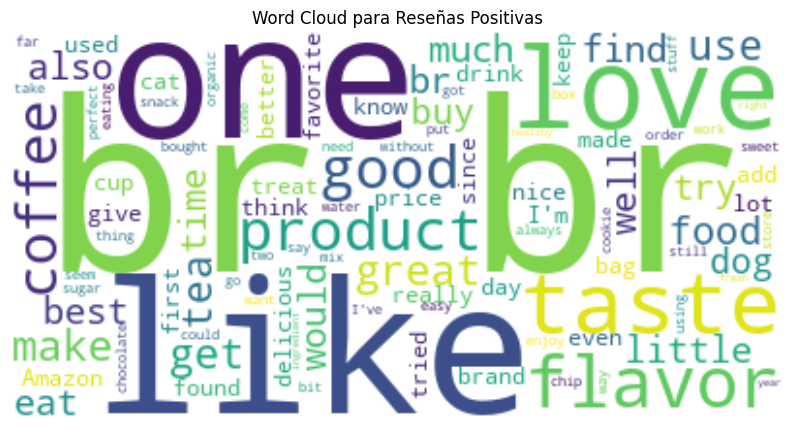

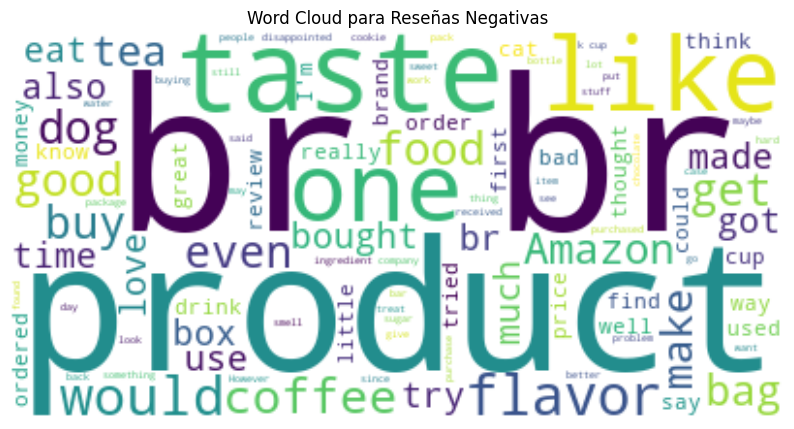

In [9]:
# Paso 4 - Más análisis de datos - separación por sentiment (positivo/negativo)

df_positive = df[df['sentiment'] == 1]
df_negative = df[df['sentiment'] == -1]

# Crear la nube de palabras para las reseñas positivas (reduciendo la muestra)
positive_text = " ".join(review for review in df_positive['Text'].sample(10000, random_state=42).astype(str))
wordcloud_positive = WordCloud(stopwords=stop_words, background_color="white", max_words=100, contour_color='green').generate(positive_text)

# Crear la nube de palabras para las reseñas negativas (reduciendo la muestra)
negative_text = " ".join(review for review in df_negative['Text'].sample(10000, random_state=42).astype(str))
wordcloud_negative = WordCloud(stopwords=stop_words, background_color="white", max_words=100, contour_color='red').generate(negative_text)

# Mostrar la nube de palabras para reseñas positivas
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud para Reseñas Positivas")
plt.show()

# Mostrar la nube de palabras para reseñas negativas
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud para Reseñas Negativas")
plt.show()


In [10]:
# creamos un pequeño df temporal para poder visualizar las ocurrencias de -1 y 1 (reemplazado por positive/negative)
# a manera de gráfico. Buscamos el conteo con value_counts 
sentiment_counts = df['sentiment'].replace({1: 'positive', -1: 'negative'}).value_counts().reset_index()

sentiment_counts.columns = ['sentiment', 'count']

fig = px.bar(sentiment_counts, x='sentiment', y='count', 
             title='Product Sentiment',
             color='sentiment',
             color_discrete_sequence=['blue', 'orange'],
             template='plotly_white')


fig.show()

In [11]:
# Paso 5 - construir el modelo
# Aplicar la limpieza de datos a la columna 'summary' utilizando una lambda para convertir
# a minúsculas, y también borrar puntuaciones (como puntos, comas, y guiones)
df['cleaned_summary'] = df['Summary'].astype(str).apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))

# Guardar como variables las ejes de la limpieza anterior
modelo_x = df['cleaned_summary']
modelo_y = df['sentiment']

# División en conjunto de entrenamiento; 80% train y 20% test
modelo_x_train, modelo_x_test, modelo_y_train, modelo_y_test = train_test_split(modelo_x, modelo_y, test_size=0.2, random_state=42)

In [12]:
# crear objeto CountVectorizer para la bolsa de palabras
# Con este convertiremos texto en una matriz de conteo de palabras
vectorizer = CountVectorizer()

# ajustar vectorizador con los datos de entrenamiento y transformar modelo_x_train en la bolsa de palabras
bolsa_x_train = vectorizer.fit_transform(modelo_x_train)

# ajustar el vectorizador con los datos de prueba y transformar el modelo_x_test en la bolsa de palabras
bolsa_x_test = vectorizer.transform(modelo_x_test)

# imprimir las palabras únicas que se encontraron en los datos de entrenamiento
print(f'Bolsa -  Vocabulario: {vectorizer.vocabulary_}')

# podemos tambien convertir el vocabulario generado a un data frame, solo para mejorar la visibilidad
vocab_df = pd.DataFrame(list(vectorizer.vocabulary_.items()), columns=['Palabra', '# Ocurrencias'])

print(f'\n {vocab_df.head()}')


Bolsa -  Vocabulario: {'almonds': 1758, 'great': 14461, 'buy': 5133, 'never': 21733, 'thought': 32467, 'id': 16236, 'have': 15190, 'to': 32709, 'say': 27935, 'no': 21870, 'more': 21056, 'fruit': 13223, 'and': 2015, 'veggies': 34253, 'we': 34882, 'love': 19041, 'this': 32428, 'stuff': 30752, 'fanfriggentastic': 11807, 'for': 12839, 'office': 22613, 'what': 35073, 'they': 32360, 'done': 10069, 'cry': 8379, 'baby': 2875, 'tears': 31994, 'good': 14088, 'cereal': 5913, 'with': 35370, 'few': 12109, 'potential': 24923, 'health': 15272, 'concerns': 7506, 'quick': 25996, 'meal': 19971, 'flavor': 12455, 'best': 3643, 'bbq': 3299, 'sauce': 27852, 'ever': 11286, 'lemonade': 18436, 'mix': 20675, 'ive': 17027, 'bought': 4419, 'if': 16261, 'you': 36023, 'like': 18638, 'the': 32258, 'taste': 31692, 'of': 22592, 'chai': 5976, 'will': 35273, 'basic': 3230, 'ramen': 26134, 'noodle': 22118, 'out': 23147, 'there': 32322, 'huge': 16038, 'bag': 2968, 'experience': 11548, 'count': 7968, 'them': 32287, 'popcor

In [13]:
# modelo de regresion logistica y predicciones

# aplicamos balanceo por si la proporción es muy marcada
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Ajustar el modelo con el conjunto de entrenamiento (bolsa_x_train y model_y_train)
log_reg.fit(bolsa_x_train, modelo_y_train)

# realizar predicciones con el conjunto de datos, en este caso, la bolsa de train
predicciones = log_reg.predict(bolsa_x_test)

print('Algunas predicciones:', predicciones[:10])

precision_modelo = accuracy_score(modelo_y_test, predicciones)
print(f'Precisión del modelo: {precision_modelo * 100:.2f}%')

Algunas predicciones: [1 1 1 1 1 1 1 1 1 1]
Precisión del modelo: 90.56%


In [14]:
# Creo mi objeto de matriz de confusion inicializado con la librería, y mandandole 
# como argumento mi modelo y de prueba, y las predicciones
matriz_confusion = confusion_matrix(modelo_y_test, predicciones)

print('Matriz de Confusión:')
print(matriz_confusion)

# creo mi objeto de classification report, que debe mostrar métricas clave del modelo
reporte_clasificacion = classification_report(modelo_y_test, predicciones)

print('\nReporte de Clasificación:')
print(reporte_clasificacion)


Matriz de Confusión:
[[14299  2080]
 [ 7846 80938]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.65      0.87      0.74     16379
           1       0.97      0.91      0.94     88784

    accuracy                           0.91    105163
   macro avg       0.81      0.89      0.84    105163
weighted avg       0.92      0.91      0.91    105163

